# Computing polygenic scores using LDpred2 (LDpred2 genome-wide)

* variants: HapMap3 variants used in PRS-CS **for what???????**

* LD reference: We provide an LD reference for European ancestry to be used by researchers who cannot compute their own. We use the 362 320 UKBB individuals as used here, with some further quality control based on allele frequencies. 

Information about these variants:

In [33]:
# $pos is in build GRCh37 / hg19, but we provide positions in 3 other builds 
info <- readRDS(url("https://ndownloader.figshare.com/files/25503788"))
str(info)

tibble [1,054,330 × 10] (S3: tbl_df/tbl/data.frame)
 $ chr     : int [1:1054330] 1 1 1 1 1 1 1 1 1 1 ...
 $ pos     : int [1:1054330] 752721 754182 760912 768448 779322 838555 846808 853954 854250 864938 ...
 $ a0      : chr [1:1054330] "A" "A" "C" "G" ...
 $ a1      : chr [1:1054330] "G" "G" "T" "A" ...
 $ rsid    : chr [1:1054330] "rs3131972" "rs3131969" "rs1048488" "rs12562034" ...
 $ af_UKBB : num [1:1054330] 0.841 0.87 0.84 0.106 0.128 ...
 $ ld      : num [1:1054330] 3.69 3.73 3.69 1.4 3.68 ...
 $ pos_hg17: int [1:1054330] 792584 794045 800775 808311 819185 878418 886671 893817 894113 904801 ...
 $ pos_hg18: int [1:1054330] 742584 744045 750775 758311 769185 828418 836671 843817 844113 854801 ...
 $ pos_hg38: int [1:1054330] 817341 818802 825532 833068 843942 903175 911428 918574 918870 929558 ...


## Downloading genotype data and summary statistics

In [34]:
library(bigsnpr)

### Read from bed/bim/fam, it generates .bk and .rds files.

In [37]:
snp_readBed("tmp-data/public-data.bed")

ERROR: Error: File 'tmp-data/public-data.bk' already exists.


### Attach the "bigSNP" object in R session

559 patients and 130816 genes?

In [38]:
obj.bigSNP <- snp_attach("tmp-data/public-data.rds")
# See how the file looks like
str(obj.bigSNP, max.level = 2, strict.width = "cut")
#130816/559

List of 3
 $ genotypes:Reference class 'FBM.code256' [package "bigstatsr"] with 15 fields
  ..and 26 methods, of which 12 are  possibly relevant:
  ..  add_columns, as.FBM, bm, bm.desc, check_dimensions,
  ..  check_write_permissions, copy#envRefClass, initialize, initialize#FBM,
  ..  save, show#FBM, show#envRefClass
 $ fam      :'data.frame':	559 obs. of  6 variables:
  ..$ family.ID  : chr [1:559] "EUR_GBR" "EUR_GBR" "EUR_GBR" "EUR_GBR" ...
  ..$ sample.ID  : chr [1:559] "HG00096" "HG00097" "HG00099" "HG00100" ...
  ..$ paternal.ID: int [1:559] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ maternal.ID: int [1:559] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ sex        : int [1:559] 1 2 2 2 1 2 1 2 2 1 ...
  ..$ affection  : int [1:559] 1 2 1 1 1 1 2 1 2 1 ...
 $ map      :'data.frame':	130816 obs. of  6 variables:
  ..$ chromosome  : int [1:130816] 2 2 2 2 2 2 2 2 2 2 ...
  ..$ marker.ID   : chr [1:130816] "rs13400442" "rs7594567" "rs7597758" "rs13"..
  ..$ genetic.dist: int [1:130816] 0 0 0 0 0 0 0 0 0 0 ...
  

### looking into the data `obj.bigSNP`

In [39]:
# genotypes
head(obj.bigSNP$genotypes)

0,0,0,0,0,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,1,1,0,1,1,0,1,0,1,1
0,0,0,0,0,0,0,0,0,0,⋯,1,1,0,1,1,0,2,0,1,1
0,0,0,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,1,1,0


In [40]:
# family
head(obj.bigSNP$fam)

,family.ID,sample.ID,paternal.ID,maternal.ID,sex,affection
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,EUR_GBR,HG00096,0,0,1,1
2,EUR_GBR,HG00097,0,0,2,2
3,EUR_GBR,HG00099,0,0,2,1
4,EUR_GBR,HG00100,0,0,2,1
5,EUR_GBR,HG00101,0,0,1,1
6,EUR_GBR,HG00102,0,0,2,1


In [41]:
# map
head(obj.bigSNP$map)

,chromosome,marker.ID,genetic.dist,physical.pos,allele1,allele2
,<int>,<chr>,<int>,<int>,<chr>,<chr>
1,2,rs13400442,0,18506,C,T
2,2,rs7594567,0,21833,G,C
3,2,rs7597758,0,22398,T,C
4,2,rs13383216,0,28228,A,G
5,2,rs148885999,0,32003,GTA,G
6,2,rs73138586,0,32005,A,G


### Get aliases for useful slots

In [53]:
G   <- obj.bigSNP$genotypes
CHR <- obj.bigSNP$map$chromosome       # chromosome number
POS <- obj.bigSNP$map$physical.pos     # genetic position （ascending）
y   <- obj.bigSNP$fam$affection - 1    # family affection? outcome
NCORES <- nb_cores()
dim(G)
summary(CHR)
summary(POS)
summary(y)


[1]    559 130816

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   6.000   4.927   8.000   8.000 

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
    18506  36813389  85844183  93681844 138864818 243164462 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2809  1.0000  1.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

### Read external summary statistics
cases: 157, controls: 402

In [43]:
sumstats <- bigreadr::fread2("tmp-data/public-data-sumstats.txt")
str(sumstats)
head(sumstats,10)
### allele1: reference allele, allele2: derived allele???

'data.frame':	130816 obs. of  10 variables:
 $ chromosome  : int  2 2 2 2 2 2 2 2 2 2 ...
 $ marker.ID   : chr  "rs13400442" "rs7594567" "rs7597758" "rs13383216" ...
 $ physical.pos: int  18506 21833 22398 28228 32003 32005 36787 55237 56916 61687 ...
 $ allele1     : chr  "C" "G" "T" "A" ...
 $ allele2     : chr  "T" "C" "C" "G" ...
 $ beta        : num  -0.073 0.0439 -0.3325 -0.5445 -0.4881 ...
 $ beta_se     : num  0.277 0.248 0.192 0.247 0.242 ...
 $ n_case      : int  157 157 157 157 157 157 157 157 157 157 ...
 $ n_control   : int  402 402 402 402 402 402 402 402 402 402 ...
 $ p           : num  0.7925 0.8593 0.0846 0.028 0.0439 ...


,chromosome,marker.ID,physical.pos,allele1,allele2,beta,beta_se,n_case,n_control,p
,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,2,rs13400442,18506,C,T,-0.07295006,0.2772155,157,402,0.792531845
2,2,rs7594567,21833,G,C,0.04391055,0.2476724,157,402,0.859343963
3,2,rs7597758,22398,T,C,-0.33245302,0.1924414,157,402,0.084632598
4,2,rs13383216,28228,A,G,-0.54447405,0.2471637,157,402,0.028018845
5,2,rs148885999,32003,GTA,G,-0.48808613,0.2416836,157,402,0.043919800
6,2,rs73138586,32005,A,G,-0.05095579,0.2069469,157,402,0.805599345
7,2,rs11900053,36787,T,C,-0.25153251,0.1791844,157,402,0.160956743
8,2,rs10188860,55237,C,T,-0.41199798,0.1843832,157,402,0.025855550
9,2,rs10206578,56916,C,G,-0.61921212,0.2385241,157,402,0.009684652


### Split data to trainset and testset

There are 400 individuals to be used as validation set to tune hyper-parameters for LDpred2-grid. The other 159 individuals are used as test set to evaluate the final models.

In [44]:
set.seed(1)
ind.val <- sample(nrow(G), 400)
ind.test <- setdiff(rows_along(G), ind.val)

## Matching variants between genotype data and summary statistics

These 4 variables are used to match variants between the two data frames.

In [45]:
sumstats$n_eff <- 4 / (1 / sumstats$n_case + 1 / sumstats$n_control)
sumstats$n_case <- sumstats$n_control <- NULL
names(sumstats) <- c("chr", "rsid", "pos", "a0", "a1", "beta", "beta_se", "p", "n_eff")
map <- obj.bigSNP$map[-(2:3)]
names(map) <- c("chr", "pos", "a0", "a1")
info_snp <- snp_match(sumstats, map)

130,816 variants to be matched.

18,932 ambiguous SNPs have been removed.

Some duplicates were removed.

111,866 variants have been matched; 0 were flipped and 0 were reversed.



**Q: "a0" (reference allele) and "a1" (derived allele) ?????**

In [47]:
head(info_snp,15)

,chr,pos,a0,a1,rsid,beta,beta_se,p,n_eff,_NUM_ID_.ss,_NUM_ID_
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2,18506,C,T,rs13400442,-0.072950062,0.2772155,0.79253185,451.6208,1,1
2,2,22398,T,C,rs7597758,-0.332453022,0.1924414,0.08463260,451.6208,3,3
3,2,28228,A,G,rs13383216,-0.544474054,0.2471637,0.02801885,451.6208,4,4
4,2,32003,GTA,G,rs148885999,-0.488086130,0.2416836,0.04391980,451.6208,5,5
5,2,32005,A,G,rs73138586,-0.050955787,0.2069469,0.80559934,451.6208,6,6
6,2,36787,T,C,rs11900053,-0.251532509,0.1791844,0.16095674,451.6208,7,7
7,2,55237,C,T,rs10188860,-0.411997979,0.1843832,0.02585555,451.6208,8,8
8,2,63452,G,T,rs957298,0.005241966,0.2797547,0.98505717,451.6208,11,11
9,2,65914,C,T,rs62116664,0.126174598,0.2676700,0.63755648,451.6208,12,12


If no or few variants are actually flipped (????), you might want to disable the strand flipping option. Here, these are simulated data so all variants use the same strand and the same reference.

In [48]:
info_snp <- snp_match(sumstats, map, strand_flip = FALSE)

130,816 variants to be matched.

Some duplicates were removed.

130,792 variants have been matched; 0 were flipped and 0 were reversed.



In [63]:
head(info_snp)

,chr,pos,a0,a1,rsid,beta,beta_se,p,n_eff,_NUM_ID_.ss,_NUM_ID_
,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,2,18506,C,T,rs13400442,-0.07295006,0.2772155,0.79253185,451.6208,1,1
2,2,21833,G,C,rs7594567,0.04391055,0.2476724,0.85934396,451.6208,2,2
3,2,22398,T,C,rs7597758,-0.33245302,0.1924414,0.08463260,451.6208,3,3
4,2,28228,A,G,rs13383216,-0.54447405,0.2471637,0.02801885,451.6208,4,4
5,2,32003,GTA,G,rs148885999,-0.48808613,0.2416836,0.04391980,451.6208,5,5
6,2,32005,A,G,rs73138586,-0.05095579,0.2069469,0.80559934,451.6208,6,6


## Computing LDpred2 scores for one chromosome 

Some **quality control** on summary statistics is highly recommended (see paper). [check the code here](https://github.com/privefl/paper-ldpred2/blob/master/code/prepare-sumstats.R)

### Correlation

Compute correlations between variants. We recommend to use a window size of 3 cM. Here, we have built the LD matrix using variants from one chromosome only. 

In [50]:
POS2 <- snp_asGeneticPos(CHR, POS, dir = "tmp-data", ncores = NCORES)

In [59]:
## indices in info_snp
ind.chr <- which(info_snp$chr == 2)
df_beta <- info_snp[ind.chr, c("beta", "beta_se", "n_eff")]

In [60]:
## indices in G
ind.chr2 <- info_snp$`_NUM_ID_`[ind.chr]
corr0 <- snp_cor(G, ind.col = ind.chr2, ncores = NCORES,
                 infos.pos = POS2[ind.chr2], size = 3 / 1000)

In [69]:
tmp <- tempfile(tmpdir = "tmp-data")
if (packageVersion("bigsnpr") >= package_version("1.4.9") &&
    packageVersion("bigsparser") >= package_version("0.4.0")) {
  corr <- as_SFBM(corr0, tmp)
} else {
  corr <- bigsparser::as_SFBM(as(corr0, "dgCMatrix"), tmp)
}

In practice, build LD matrix for variants from all chromosomes. Please look at the [code](https://github.com/privefl/paper-ldpred2/blob/master/code/prepare-corr-spmat.R#L1-L26) linked at the beginning. Code:

### Infinitesimal model

In [66]:
ldsc <- snp_ldsc2(corr0, df_beta)
ldsc

int        h2 
1.0000000 0.1146349

In [70]:
h2_est <- ldsc[["h2"]]
beta_inf <- snp_ldpred2_inf(corr, df_beta, h2 = h2_est)
pred_inf <- big_prodVec(G, beta_inf, ind.row = ind.test, ind.col = ind.chr2)

In [71]:
AUCBoot(pred_inf, y[ind.test])

Mean       2.5%      97.5%         Sd 
0.66347145 0.56739110 0.75341191 0.04784474

### Grid of models

In practice, we recommend to test multiple values for h2 and p. 

In [72]:
(h2_seq <- round(h2_est * c(0.7, 1, 1.4), 4))
(p_seq <- signif(seq_log(1e-4, 1, length.out = 17), 2))
(params <- expand.grid(p = p_seq, h2 = h2_seq, sparse = c(FALSE, TRUE)))

[1] 0.0802 0.1146 0.1605

[1] 0.00010 0.00018 0.00032 0.00056 0.00100 0.00180 0.00320 0.00560 0.01000
[10] 0.01800 0.03200 0.05600 0.10000 0.18000 0.32000 0.56000 1.00000

p,h2,sparse
<dbl>,<dbl>,<lgl>
0.00010,0.0802,FALSE
0.00018,0.0802,FALSE
0.00032,0.0802,FALSE
0.00056,0.0802,FALSE
0.00100,0.0802,FALSE
0.00180,0.0802,FALSE
0.00320,0.0802,FALSE
0.00560,0.0802,FALSE
0.01000,0.0802,FALSE


In [73]:
# takes several minutes if you do not have many cores
beta_grid <- snp_ldpred2_grid(corr, df_beta, params, ncores = NCORES)
pred_grid <- big_prodMat(G, beta_grid, ind.col = ind.chr2)
params$score <- big_univLogReg(as_FBM(pred_grid[ind.val, ]), y[ind.val])$score

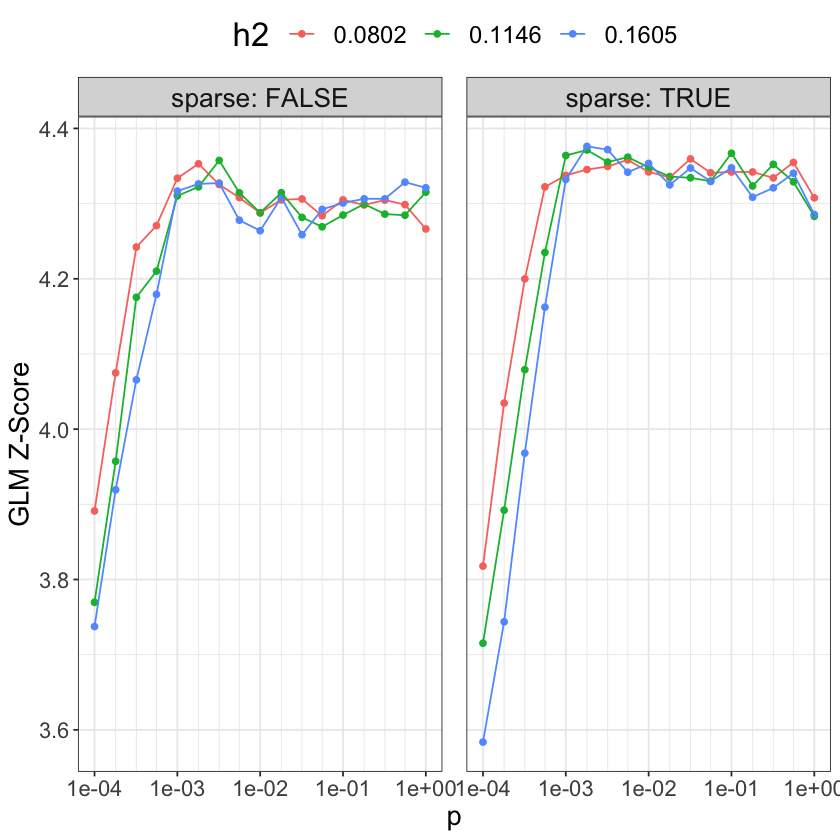

In [75]:
library(ggplot2)
ggplot(params, aes(x = p, y = score, color = as.factor(h2))) +
  theme_bigstatsr() +
  geom_point() +
  geom_line() +
  scale_x_log10(breaks = 10^(-5:0), minor_breaks = params$p) +
  facet_wrap(~ sparse, labeller = label_both) +
  labs(y = "GLM Z-Score", color = "h2") +
  theme(legend.position = "top", panel.spacing = unit(1, "lines"))

In [76]:
library(dplyr)
params %>%
  mutate(sparsity = colMeans(beta_grid == 0), id = row_number()) %>%
  arrange(desc(score)) %>%
  mutate_at(c("score", "sparsity"), round, digits = 3) %>%
  slice(1:10)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




p,h2,sparse,score,sparsity,id
<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<int>
0.0018,0.1605,TRUE,4.376,0.560,91
0.0032,0.1605,TRUE,4.372,0.541,92
0.0018,0.1146,TRUE,4.371,0.573,74
0.1000,0.1146,TRUE,4.367,0.573,81
0.0010,0.1146,TRUE,4.364,0.591,73
0.0056,0.1146,TRUE,4.362,0.565,76
0.0320,0.0802,TRUE,4.359,0.585,62
0.0056,0.0802,TRUE,4.358,0.581,59
0.0032,0.1146,FALSE,4.357,0.000,24


You can then choose the best model according to your preferred criterion (e.g. max AUC). Here, we use the Z-Score from the regression of the phenotype by the Polygenic risk scores (PRS) since we have found it more robust than using the AUC. It also enables adjusting for covariates in this step (using parameter covar.train in big_univLogReg() or big_univLinReg()).

Also note that we separate both sparse and non-sparse models here (and in the paper) to show that their predictive performance are similar. In practice, if you do not really care about sparsity, you could choose the best LDpred2-grid model among all sparse and non-sparse models.

In [77]:
best_grid_nosp <- params %>%
  mutate(id = row_number()) %>%
  filter(!sparse) %>%
  arrange(desc(score)) %>%
  slice(1) %>%
  pull(id) %>%
  beta_grid[, .]

pred_nosp <- big_prodVec(G, best_grid_nosp, ind.row = ind.test, ind.col = ind.chr2)
AUCBoot(pred_nosp, y[ind.test])

Mean       2.5%      97.5%         Sd 
0.66872937 0.57160713 0.75882534 0.04788791

In [78]:
best_grid_sp <- params %>%
  mutate(id = row_number()) %>%
  filter(sparse) %>%
  arrange(desc(score)) %>%
  slice(1) %>%
  pull(id) %>%
  beta_grid[, .]

pred_sp <- big_prodVec(G, best_grid_sp, ind.row = ind.test, ind.col = ind.chr2)
AUCBoot(pred_sp, y[ind.test])

Mean       2.5%      97.5%         Sd 
0.67315481 0.57063560 0.76827688 0.05030831

### Automatic model

We recommend to run many of them in parallel with different initial values for p (e.g. length.out = 30).

In [79]:
# takes a few minutes
multi_auto <- snp_ldpred2_auto(corr, df_beta, h2_init = h2_est,
                               vec_p_init = seq_log(1e-4, 0.9, length.out = NCORES),
                               ncores = NCORES)
str(multi_auto)

List of 2
 $ :List of 8
  ..$ beta_est   : num [1:52546] -6.52e-07 3.84e-07 -2.98e-06 -4.87e-06 -4.36e-06 ...
  ..$ postp_est  : num [1:52546] 0.0224 0.0224 0.0224 0.0225 0.0225 ...
  ..$ p_est      : num 0.0225
  ..$ h2_est     : num 0.00105
  ..$ path_p_est : num [1:1500] 2.32e-05 9.24e-06 6.16e-06 1.34e-04 2.43e-04 ...
  ..$ path_h2_est: num [1:1500] 0.056355 0.004485 0.0001 0.000786 0.001005 ...
  ..$ h2_init    : num 0.115
  ..$ p_init     : num 1e-04
 $ :List of 8
  ..$ beta_est   : num [1:52546] -2.41e-06 1.47e-06 -1.10e-05 -1.80e-05 -1.62e-05 ...
  ..$ postp_est  : num [1:52546] 0.766 0.766 0.766 0.766 0.766 ...
  ..$ p_est      : num 0.766
  ..$ h2_est     : num 0.00385
  ..$ path_p_est : num [1:1500] 0.898 0.892 0.893 0.89 0.888 ...
  ..$ path_h2_est: num [1:1500] 0.113 0.114 0.11 0.114 0.108 ...
  ..$ h2_init    : num 0.115
  ..$ p_init     : num 0.9


You should verify if the chains “converged”. You can look at the path of the chains, as shown below. In the paper, we propose an automatic way to filter bad chains by comparing the scale of the resulting predictions (see [this code](https://github.com/privefl/paper-ldpred2/blob/master/code/run-ldpred2-gwide.R#L108-L112), reproduced below).

This is not the case here, which is probably because the data is so small.

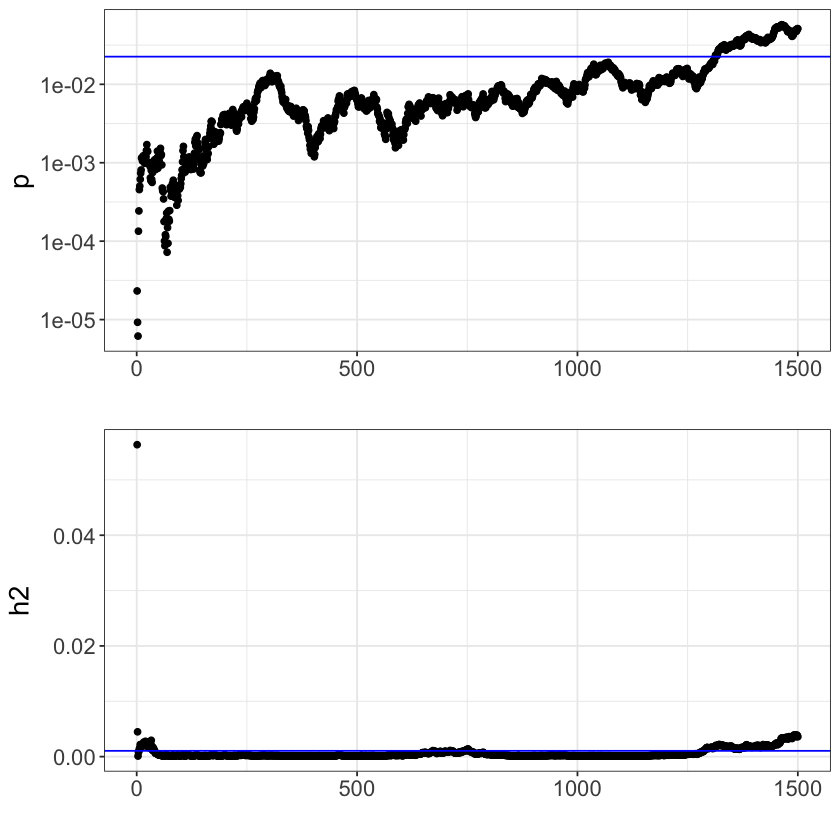

In [80]:
auto <- multi_auto[[1]]
plot_grid(
  qplot(y = auto$path_p_est) +
    theme_bigstatsr() +
    geom_hline(yintercept = auto$p_est, col = "blue") +
    scale_y_log10() +
    labs(y = "p"),
  qplot(y = auto$path_h2_est) +
    theme_bigstatsr() +
    geom_hline(yintercept = auto$h2_est, col = "blue") +
    labs(y = "h2"),
  ncol = 1, align = "hv"
)

In [81]:
beta_auto <- sapply(multi_auto, function(auto) auto$beta_est)
pred_auto <- big_prodMat(G, beta_auto, ind.row = ind.test, ind.col = ind.chr2)

sc <- apply(pred_auto, 2, sd)
keep <- abs(sc - median(sc)) < 3 * mad(sc)
final_beta_auto <- rowMeans(beta_auto[, keep])
final_pred_auto <- rowMeans(pred_auto[, keep])

AUCBoot(final_pred_auto, y[ind.test])

Mean       2.5%      97.5%         Sd 
0.66340637 0.56758960 0.75445992 0.04749151

## Conclusions

We have seen how to run 3 versions of LDpred2 (“-inf”, “-grid” and “-auto”) for one chromosome.